In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create an engine to connect to our database..
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model. to automap sql classes into python.
# reflect the tables to only get python classes.
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found.
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table by re-defining them.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# view columns for Measurment...
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c72f5fb160>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
# view columns for Station..
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c72f5fba20>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [12]:
# view the Station columns content....
for row in session.query(Station.latitude, Station.station, Station.elevation, Station.longitude, Station.id, Station.name).limit(15).all():
    print(row)

(21.2716, 'USC00519397', 3.0, -157.8168, 1, 'WAIKIKI 717.2, HI US')
(21.4234, 'USC00513117', 14.6, -157.8015, 2, 'KANEOHE 838.1, HI US')
(21.5213, 'USC00514830', 7.0, -157.8374, 3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(21.3934, 'USC00517948', 11.9, -157.9751, 4, 'PEARL CITY, HI US')
(21.4992, 'USC00518838', 306.6, -158.0111, 5, 'UPPER WAHIAWA 874.3, HI US')
(21.33556, 'USC00519523', 19.5, -157.71139, 6, 'WAIMANALO EXPERIMENTAL FARM, HI US')
(21.45167, 'USC00519281', 32.9, -157.84888999999998, 7, 'WAIHEE 837.5, HI US')
(21.3152, 'USC00511918', 0.9, -157.9992, 8, 'HONOLULU OBSERVATORY 702.2, HI US')
(21.3331, 'USC00516128', 152.4, -157.8025, 9, 'MANOA LYON ARBO 785.2, HI US')


In [13]:
# view the Measurement columns content....
for row in session.query(Measurement.prcp, Measurement.id, Measurement.tobs, Measurement.station, Measurement.date).limit(15).all():
    print(row)

(0.08, 1, 65.0, 'USC00519397', '2010-01-01')
(0.0, 2, 63.0, 'USC00519397', '2010-01-02')
(0.0, 3, 74.0, 'USC00519397', '2010-01-03')
(0.0, 4, 76.0, 'USC00519397', '2010-01-04')
(None, 5, 73.0, 'USC00519397', '2010-01-06')
(0.06, 6, 70.0, 'USC00519397', '2010-01-07')
(0.0, 7, 64.0, 'USC00519397', '2010-01-08')
(0.0, 8, 68.0, 'USC00519397', '2010-01-09')
(0.0, 9, 73.0, 'USC00519397', '2010-01-10')
(0.01, 10, 64.0, 'USC00519397', '2010-01-11')
(0.0, 11, 61.0, 'USC00519397', '2010-01-12')
(0.0, 12, 66.0, 'USC00519397', '2010-01-14')
(0.0, 13, 65.0, 'USC00519397', '2010-01-15')
(0.0, 14, 68.0, 'USC00519397', '2010-01-16')
(0.0, 15, 64.0, 'USC00519397', '2010-01-17')


In [14]:
# first date in Measurement table..
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [16]:
# last date in Measurement table..
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date[0]

'2017-08-23'

# Exploratory Climate Analysis

In [20]:
# the date 12 month from last date...
query_date = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
print(query_date)

2016-08-23


In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# query_date = dt.date(last_date[0]) - dt.timedelta(days= 365)
# query Measurement table and filter by date to get data for last 12 month using last date from above query...
# creat a pandas dataframe for date and percipitation and use it for plot...

data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= last_date[0], Measurement.date >= query_date).\
    order_by(Measurement.date).all()
    
data_df = pd.DataFrame(data, columns = ['date', 'prcp'])
data_df = data_df.set_index('date').dropna()
data_df.tail()
# date = [data[0] for dt in data]
# prcp = [data[1] for dt in data]

,prcp
date,
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45


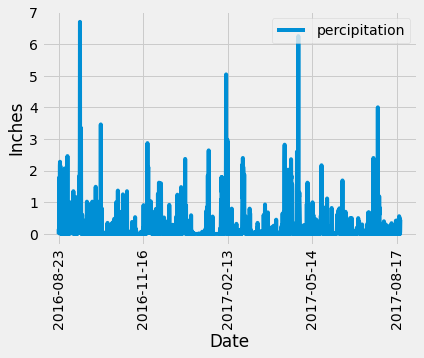

In [22]:
# percipitation plot..

data_df.plot(rot=90)
plt.legend(['percipitation'], loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.savefig("images/precipitation.png")
plt.show()

In [23]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
print(query_date)

2016-08-23


In [24]:
# Perform a query to retrieve the data and precipitation scores

data_query = session.query(Measurement.date, Measurement.tobs, Measurement.station, Measurement.prcp, Measurement.id)

In [158]:
# Create a dataframe from the query results and set the index to the date column

prcp_df = pd.DataFrame(data_query, columns = ['date', 'tobs', 'station', 'prcp', 'id'])
prcp_df = prcp_df.set_index('date').dropna()
prcp_df.head()

,tobs,station,prcp,id
date,,,,
2010-01-01,65.0,USC00519397,0.08,1
2010-01-02,63.0,USC00519397,0.00,2
2010-01-03,74.0,USC00519397,0.00,3
2010-01-04,76.0,USC00519397,0.00,4
2010-01-07,70.0,USC00519397,0.06,6


In [157]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date', ascending=False)
prcp_df.head()

,tobs,station,prcp,id
date,,,,
2017-08-23,76.0,USC00516128,0.45,19550
2017-08-23,82.0,USC00519523,0.08,12187
2017-08-23,82.0,USC00514830,0.00,7635
2017-08-23,81.0,USC00519397,0.00,2724
2017-08-22,76.0,USC00516128,0.50,19549


In [159]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary_stat = data_df[["prcp"]].describe()
summary_stat

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [29]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Station.station).count()

print(f"There are: {stations} Stations in This Dataset")

There are: 9 Stations in This Dataset


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_count = prcp_df.groupby(["station"])['station'].count()
station_count = station_count.sort_values(ascending=False)
station_count

station
USC00519281    2772
USC00513117    2696
USC00519397    2685
USC00519523    2572
USC00516128    2484
USC00514830    1937
USC00511918    1932
USC00517948     683
USC00518838     342
Name: station, dtype: int64

In [31]:
# most active station...
most_active_station = station_count.index[0]
most_active_station

'USC00519281'

In [32]:
# Using the Measurement id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active Measurement?

sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs), func.count(Measurement.tobs)]
records = session.query(*sel).\
    filter(Measurement.station == most_active_station)
    
for rec in records:
    print(f"For Station USC00519281:")
    print(f"Min Temprature is: {rec[0]}")
    print(f"Max Temprature is: {rec[1]}")
    print(f"Average Temprature is: {round(rec[2], 2)}")
    print(f"Station Observation Count is: {rec[3]}")

For Station USC00519281:
Min Temprature is: 54.0
Max Temprature is: 85.0
Average Temprature is: 71.66
Station Observation Count is: 2772


In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# query the last 12 months of temp observation from Measurement table for selected station..
# filtered for station with highest observation and on date to only return last 12 month data...

temp = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date <= last_date[0], Measurement.date >= query_date).all()

In [34]:
# created a pandas dataframe for plot data...

hist_df = pd.DataFrame(temp, columns = ['tobs'])
hist_df = hist_df.dropna()
hist_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


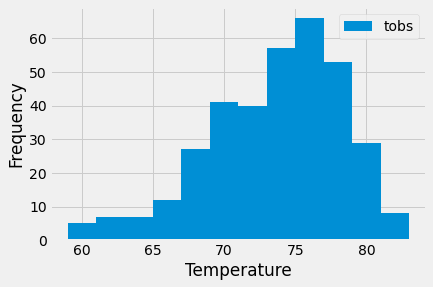

In [35]:
# plotting histogram for temperation on last 12 month for station USC00519281...

hist_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig("images/histogram.png")
plt.show()

# Bonus Challenge Assignment

# Temperature Analysis I

In [36]:
# import modules...
from scipy import stats

# query average temperature for month of June across all stations..
june_avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.tobs)).all()
june_avg_temp

[('USC00516128', 71.9372197309417),
 ('USC00519281', 73.27118644067797),
 ('USC00518838', 73.39473684210526),
 ('USC00513117', 74.05084745762711),
 ('USC00511918', 74.13939393939394),
 ('USC00514830', 76.00537634408602),
 ('USC00517948', 76.6554054054054),
 ('USC00519523', 76.66810344827586),
 ('USC00519397', 77.55932203389831)]

In [37]:
 # query average temperature for month of December across all stations..
dec_avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.tobs)).all()
dec_avg_temp

[('USC00516128', 69.29126213592232),
 ('USC00511918', 69.6842105263158),
 ('USC00519281', 69.90322580645162),
 ('USC00513117', 71.06944444444444),
 ('USC00519397', 71.10952380952381),
 ('USC00517948', 71.8348623853211),
 ('USC00518838', 72.42105263157895),
 ('USC00519523', 72.43333333333334),
 ('USC00514830', 73.2247191011236)]

In [38]:
# append average temperature column for June to a list....
june_list = []
for i in june_avg_temp:
    june_list.append(i[1])
    # print(i[1])
june_list

[71.9372197309417,
 73.27118644067797,
 73.39473684210526,
 74.05084745762711,
 74.13939393939394,
 76.00537634408602,
 76.6554054054054,
 76.66810344827586,
 77.55932203389831]

In [39]:
# append average temperature column for December to a list....
dec_list = []
for i in dec_avg_temp:
    dec_list.append(i[1])
dec_list

[69.29126213592232,
 69.6842105263158,
 69.90322580645162,
 71.06944444444444,
 71.10952380952381,
 71.8348623853211,
 72.42105263157895,
 72.43333333333334,
 73.2247191011236]

In [40]:
# run paired t-test using month lists.....
# used pired t-test because we are using the same varialbe "temperature" across two different time frames...
stats.ttest_rel(june_list, dec_list)

Ttest_relResult(statistic=17.003165938723054, pvalue=1.4530971041972015e-07)

# Temperature Analysis II

In [41]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 74.0, 69.57142857142857)]


In [165]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# taking 2 weeks trip from '2017-08-09' to '2017-08-23'...
trip_start_date = '2017-07-03'
trip_end_date = '2017-07-23'

# using calc_temps function to calculate temperture parameter for my trips...
# used np.ravel function to unpack the tuples into a list for ease to access index...
temp_data = calc_temps(trip_start_date, trip_end_date)
temp_data = list(np.ravel(temp_data))

print('Temperature Paramaters for my Trip:')
print(f'Minimum temperature is: {temp_data[0]}')
print(f'Maximum temperature is: {temp_data[1]}')
print(f'Average temperature is: {round(temp_data[2], 2)}')

Temperature Paramaters for my Trip:
Minimum temperature is: 69.0
Maximum temperature is: 87.0
Average temperature is: 78.3


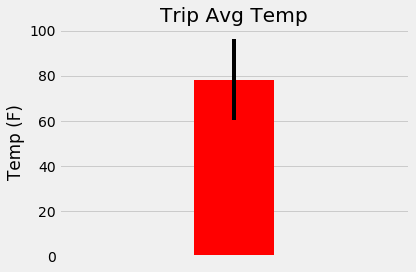

In [59]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# set the dataframe
error_bar_df = pd.DataFrame(temp_data, columns=['tmin', 'tmax', 'tavg'])

# calculate the y error
upper_error = error_bar_df['tmax']
lower_error = error_bar_df['tmin']
y_error = [upper_error - lower_error]

error_bar_df.plot.bar(y='tavg', yerr=y_error, color='red', legend=None, width=0.15)
plt.xticks(np.arange(1, 1.0))
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig("images/Trip_Avg_temp.png")
plt.show()

# Daily Rainfall Average

In [65]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def total_precipitation(start_date, end_date):
    """prcp, station, name, latitude, longitude, elevation.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        prcp, station, name, latitude, longitude, elevation
    """
    
    return session.query(func.sum(Measurement.prcp), Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date >= start_date, Measurement.date <= end_date).\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()

In [132]:
# created a dataframe using our query to list total rain for each station...
stn_data = total_precipitation(trip_start_date, trip_end_date)
stn_df = pd.DataFrame(stn_data, columns = ['Total Percipitation', 'Station', 'Name', 'Latitude', 'Longitude', 'Elevation'])
stn_df.head()

,Total Percipitation,Station,Name,Latitude,Longitude,Elevation
0,11.43,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,2.31,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,1.19,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,0.95,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,0.46,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5


In [77]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("07-04")

[(70.0, 81.0, 76.57142857142857)]

In [124]:
# calculate the daily normals for your trip

# Set the start and end date of the my trip
start_date = dt.datetime(2017, 7, 3)
end_date = dt.datetime(2017, 7, 23)

# Use the start and end date to create a range of dates
dates = session.query(Measurement.date).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        group_by(Measurement.date).all()
dates

[('2017-07-04'),
 ('2017-07-05'),
 ('2017-07-06'),
 ('2017-07-07'),
 ('2017-07-08'),
 ('2017-07-09'),
 ('2017-07-10'),
 ('2017-07-11'),
 ('2017-07-12'),
 ('2017-07-13'),
 ('2017-07-14'),
 ('2017-07-15'),
 ('2017-07-16'),
 ('2017-07-17'),
 ('2017-07-18'),
 ('2017-07-19'),
 ('2017-07-20'),
 ('2017-07-21'),
 ('2017-07-22'),
 ('2017-07-23')]

In [125]:
# push each tuple of calculations into a list called `normals`
# iterate over dates and return the index[0] which is our tuples holding the dates. save in normals list..
normals = []
for date in dates:
    normals.append(date[0]) 
# normals[0]
normals[0][5:]

'07-04'

In [122]:
# Stip off the year and save a list of %m-%d strings
# we only need to grab index (5 to the end) to only get month and day on each date..
normals_striped = []
for i in normals:
    normals_striped.append(i[5:])
normals_striped

['07-04',
 '07-05',
 '07-06',
 '07-07',
 '07-08',
 '07-09',
 '07-10',
 '07-11',
 '07-12',
 '07-13',
 '07-14',
 '07-15',
 '07-16',
 '07-17',
 '07-18',
 '07-19',
 '07-20',
 '07-21',
 '07-22',
 '07-23']

In [139]:
# Loop through the list of %m-%d strings and calculate the normals for each date
# using the fuction daily_normals, loop through the list of dates to return temperature values..
normals_data = []
for i in normals_striped:
    each_date = daily_normals(i)
    normals_data.append(each_date)
normals_data

[[(70.0, 81.0, 76.57142857142857)],
 [(66.0, 81.0, 75.0)],
 [(69.0, 81.0, 75.0)],
 [(69.0, 82.0, 74.91071428571429)],
 [(69.0, 83.0, 76.08333333333333)],
 [(68.0, 83.0, 76.19298245614036)],
 [(68.0, 82.0, 75.62068965517241)],
 [(70.0, 81.0, 75.78947368421052)],
 [(67.0, 82.0, 75.96491228070175)],
 [(69.0, 81.0, 76.1896551724138)],
 [(61.0, 82.0, 76.2280701754386)],
 [(68.0, 82.0, 76.2542372881356)],
 [(70.0, 83.0, 76.34482758620689)],
 [(70.0, 83.0, 76.30188679245283)],
 [(72.0, 83.0, 76.63793103448276)],
 [(68.0, 83.0, 75.89090909090909)],
 [(69.0, 82.0, 75.46296296296296)],
 [(69.0, 83.0, 76.9245283018868)],
 [(69.0, 81.0, 75.78846153846153)],
 [(70.0, 84.0, 76.20370370370371)]]

In [185]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df = pd.DataFrame(normals_data, columns = ['Minimum Temp', 'Maximum Temp', 'Averge Temp'])
daily_normals_df

ValueError: Shape of passed values is (60, 1), indices imply (60, 3)

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
